# Cinema Success Blueprint: Informing Microsoft's Movie Studio

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Microsoft, a technology giant, is venturing into the movie industry by establishing a new movie studio. However, lacking experience in the film domain, they need to overcome the challenge of understanding what types of films are currently performing well at the box office. The objective is to analyze relevant data and provide actionable insights that will help Microsoft's movie studio leadership make informed decisions regarding the types of films they should produce to achieve success in the market.

> **Problem Statement:** 
Identifying the types of films that are currently performing well at the box office to assist Microsoft's new movie studio in making informed decisions and maximizing their chances of success in the highly competitive movie industry.

## 1. Reading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
bom_df = pd.read_csv('bom.movie_gross.csv')
rt_df = pd.read_csv('rt.movie_info.tsv', sep='\t')
tmdb_df = pd.read_csv('tmdb.movies.csv')
tn_df = pd.read_csv('tn.movie_budgets.csv')

In [3]:
# Merge the datasets
merged_data = pd.merge(tmdb_df, tn_df, left_on='original_title', right_on='movie', how='inner')
merged_data = pd.merge(rt_df, tn_df, left_on='theater_date', right_on='release_date', how='inner')

## 2. Checking the Data

In [4]:
# Previewing the top of our dataset
merged_data.head(3)

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,id_y,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,71,"Oct 9, 1971",The French Connection,"$2,200,000","$41,158,757","$41,158,757"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,81,"Aug 17, 2012",The Expendables 2,"$100,000,000","$85,028,192","$311,979,256"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,89,"Aug 17, 2012",ParaNorman,"$60,000,000","$56,003,051","$108,119,662"


In [5]:
# Previewing the bottom of our dataset
merged_data.tail()

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,id_y,release_date,movie,production_budget,domestic_gross,worldwide_gross
2067,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures,62,"Jun 30, 1999","South Park: Bigger, Longer & Uncut","$21,000,000","$52,037,603","$52,037,603"
2068,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema,75,"Aug 18, 2006",Snakes on a Plane,"$33,000,000","$34,020,814","$62,020,814"
2069,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema,22,"Aug 18, 2006",The Illusionist,"$16,500,000","$39,868,642","$83,792,062"
2070,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema,6,"Aug 18, 2006",Trust the Man,"$9,000,000","$1,530,535","$2,548,378"
2071,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema,32,"Aug 18, 2006",10th & Wolf,"$8,000,000","$54,702","$143,782"


In [6]:
merged_data.shape

(2072, 18)

In [7]:
# Overal statistics
merged_data.describe()

,id_x,id_y
count,2072.000000,2072.000000
mean,1027.219595,49.142375
std,581.748612,28.911953
min,1.000000,1.000000
25%,521.500000,23.000000
50%,1038.000000,49.000000
75%,1554.750000,74.000000
max,1997.000000,100.000000


In [8]:
# Checking whether each column has an appropriate datatype
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_x               2072 non-null   int64 
 1   synopsis           2071 non-null   object
 2   rating             2072 non-null   object
 3   genre              2072 non-null   object
 4   director           1832 non-null   object
 5   writer             1708 non-null   object
 6   theater_date       2072 non-null   object
 7   dvd_date           2072 non-null   object
 8   currency           1207 non-null   object
 9   box_office         1207 non-null   object
 10  runtime            2057 non-null   object
 11  studio             1523 non-null   object
 12  id_y               2072 non-null   int64 
 13  release_date       2072 non-null   object
 14  movie              2072 non-null   object
 15  production_budget  2072 non-null   object
 16  domestic_gross     2072 non-null   object


## 3. Data Wrangling

In [9]:
# Identifying the Missing Data
merged_data.isna().sum()

id_x                   0
synopsis               1
rating                 0
genre                  0
director             240
writer               364
theater_date           0
dvd_date               0
currency             865
box_office           865
runtime               15
studio               549
id_y                   0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

In [10]:
# Check for any duplicates
merged_data.duplicated().any()

False

In [11]:
# Dealing with the Missing Data
# Drop rows with missing values
merged_data.dropna(axis=0, inplace=True)

## 4. Data Preprocessing

In [12]:
# More data cleaning procedures
# Remove irrelevant columns
columns_to_drop = ['id_x', 'currency', 'synopsis', 'id_y', 'theater_date', 'dvd_date']

if merged_data is not None:
    merged_data.drop(columns_to_drop, axis=1, inplace=True)
    merged_data.rename(columns={'movie': 'title'}, inplace=True)
    merged_data['release_date'] = pd.to_datetime(merged_data['release_date'])
else:
    print("Error: merged_data is None. Make sure you have properly loaded and merged your datasets.")

In [13]:
# Remove dollar signs and commas from specific columns
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross', 'box_office']

for column in columns_to_clean:
    merged_data[column] = merged_data[column].apply(lambda x: str(x).replace('$', '').replace(',', ''))

# Convert columns to numeric type

merged_data[columns_to_clean] = merged_data[columns_to_clean].astype(float)

In [14]:
# Explore the distribution of movie ratings
rating_counts = merged_data['rating'].value_counts()
rating_counts

R        394
PG-13    275
PG       165
NR        31
G         18
NC17       5
Name: rating, dtype: int64

## 5. Exploratory Data Analysis

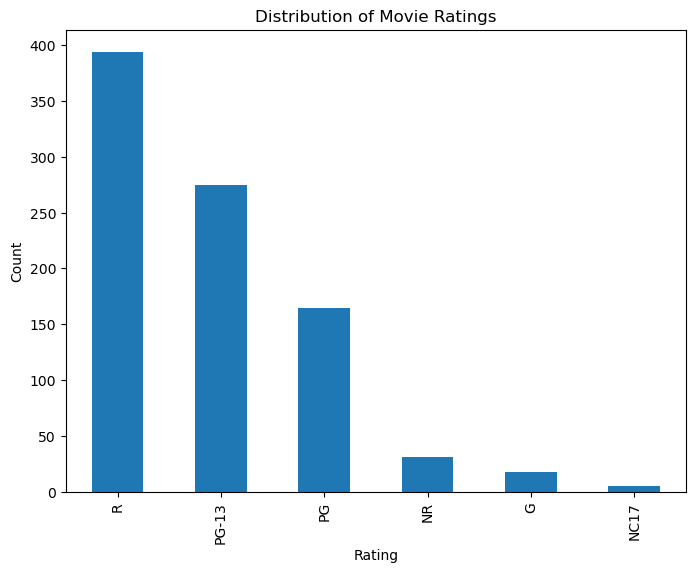

In [15]:
# Visualize the distribution of movie ratings
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [16]:
# Analyze the distribution of genres
genres = merged_data['genre'].str.split('|', expand=True).stack().value_counts()
genres

Drama                          474
Comedy                         389
Action and Adventure           197
Mystery and Suspense           147
Science Fiction and Fantasy    111
Romance                        105
Kids and Family                 98
Horror                          88
Animation                       67
Art House and International     64
Musical and Performing Arts     33
Documentary                     21
Television                      14
Sports and Fitness              11
Western                         11
Special Interest                 9
Faith and Spirituality           6
Cult Movies                      5
dtype: int64

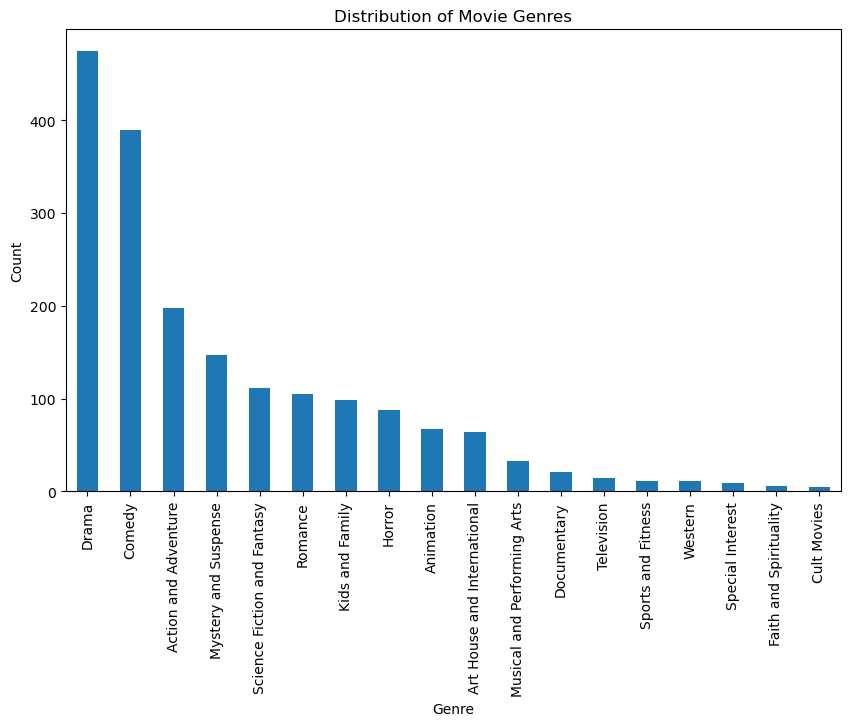

In [17]:
# Visualize the distribution of genres
plt.figure(figsize=(10, 6))
genres.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [18]:
# Calculate profitability by subtracting production budget from box office revenue
merged_data['profit'] = merged_data['box_office'].astype(float) - merged_data['production_budget'].astype(float)

In [19]:
# Identify successful studios based on total revenue
studio_revenue = merged_data.groupby('studio')['box_office'].sum()
sorted_studio_revenue = studio_revenue.sort_values(ascending=False)
top_studios = sorted_studio_revenue.nsmallest(3).index.tolist()

print(sorted_studio_revenue)
print(top_studios)

studio
Universal Pictures            6.602765e+09
20th Century Fox              3.425416e+09
Sony Pictures                 2.992947e+09
Paramount Pictures            2.563171e+09
Warner Bros. Pictures         2.440763e+09
                                  ...     
First Independent Pictures    1.191360e+05
First Run Features            5.313600e+04
Phase 4 Films                 4.989600e+04
Monterey Media                4.419800e+04
Lorber Films                  1.089000e+03
Name: box_office, Length: 97, dtype: float64
['Lorber Films', 'Monterey Media', 'Phase 4 Films']


In [20]:
# Explore unique values and counts of categorical columns
merged_data['genre'].value_counts()

Comedy                                                      132
Drama                                                       108
Comedy|Drama                                                 71
Drama|Mystery and Suspense                                   33
Comedy|Romance                                               29
                                                           ... 
Art House and International|Drama|Special Interest            2
Drama|Musical and Performing Arts|Faith and Spirituality      2
Science Fiction and Fantasy                                   2
Art House and International|Drama|Mystery and Suspense        2
Kids and Family|Musical and Performing Arts                   1
Name: genre, Length: 75, dtype: int64

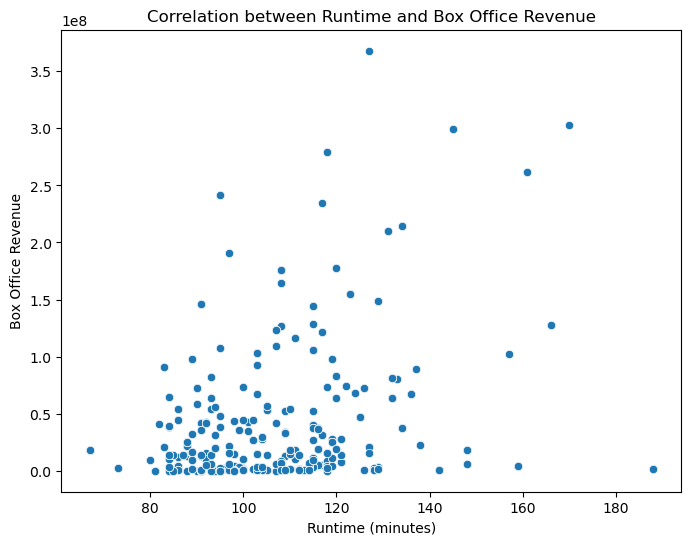

In [21]:
# Convert runtime to numeric format (e.g., 108 minutes to 108)
merged_data['runtime'] = merged_data['runtime'].str.extract('(\d+)', expand=False).astype(float)

# Create scatter plot of runtime vs. box office revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='runtime', y='box_office', data=merged_data)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Box Office Revenue')
plt.title('Correlation between Runtime and Box Office Revenue')
plt.show()

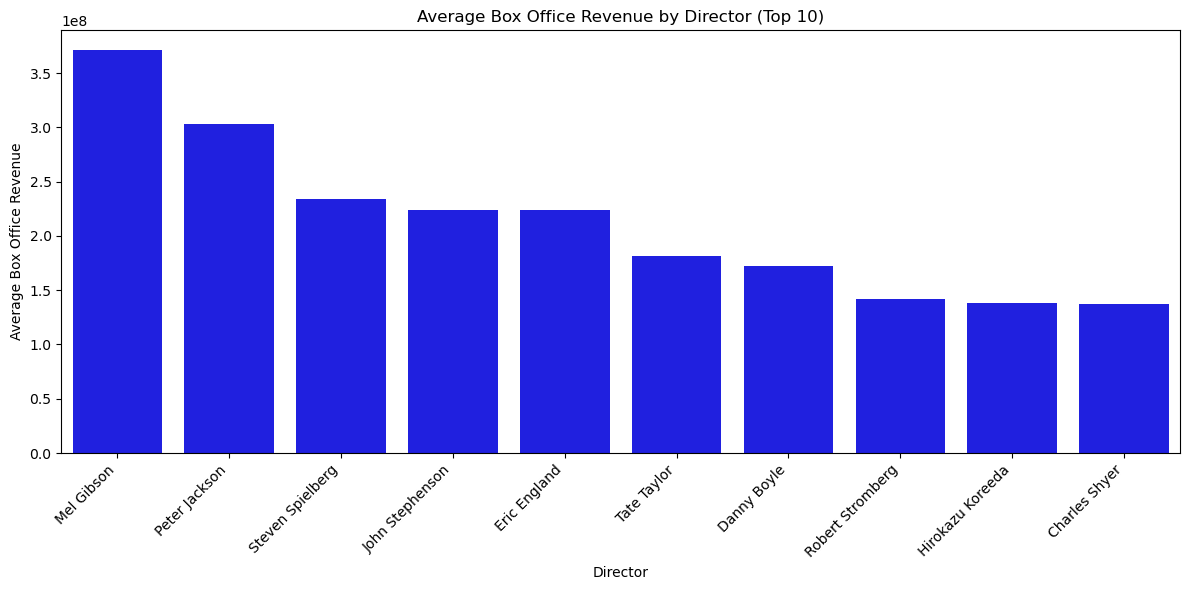

In [28]:
# Calculate average box office revenue by director
director_revenue = merged_data.groupby('director')['domestic_gross'].mean().sort_values(ascending=False)

# Select top 10 directors with highest average box office revenue
top10_directors = director_revenue.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_directors.index, y=top10_directors.values, color='blue')
plt.title('Average Box Office Revenue by Director (Top 10)')
plt.xlabel('Director')
plt.ylabel('Average Box Office Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

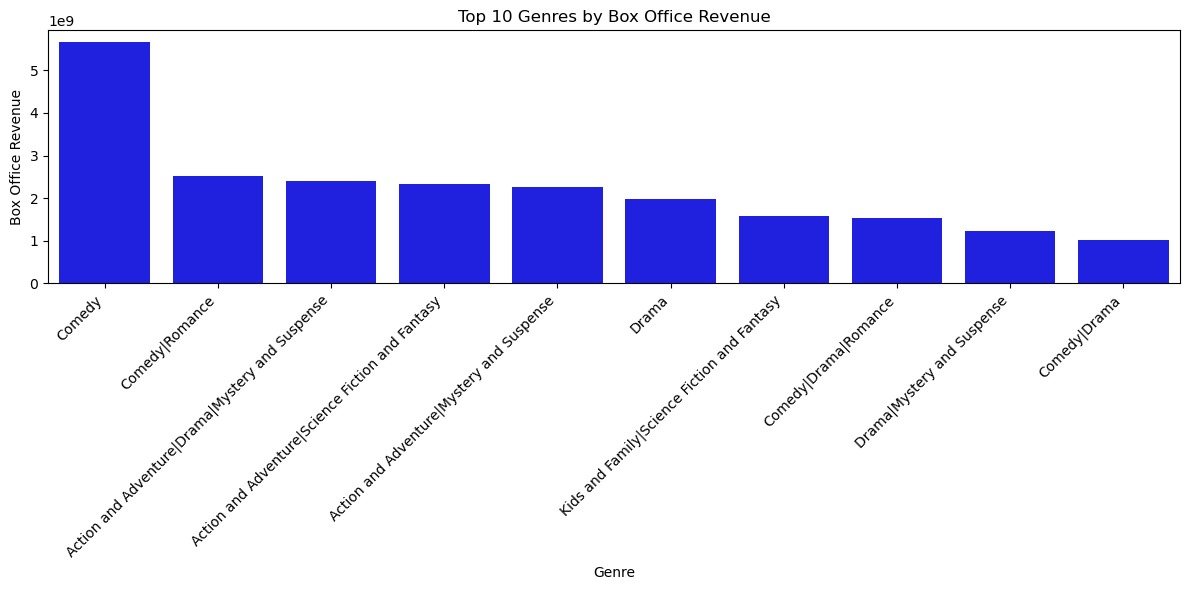

In [23]:
# Compute total box office revenue for each genre
genre_revenue = merged_data.groupby('genre')['box_office'].sum().sort_values(ascending=False)

# Select top 10 genres
top_10_genres = genre_revenue.head(10)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Box Office Revenue')
plt.title('Top 10 Genres by Box Office Revenue')
plt.tight_layout()
plt.show()

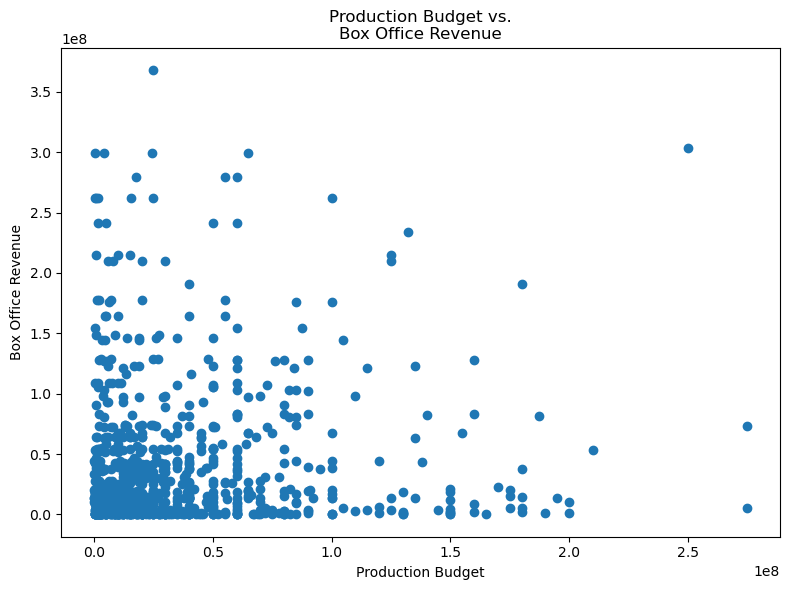

In [24]:
# Scatter plot of production budget vs. box office revenue
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['production_budget'], merged_data['box_office'])
plt.title('Production Budget vs.\nBox Office Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Box Office Revenue')
plt.tight_layout()
plt.show()

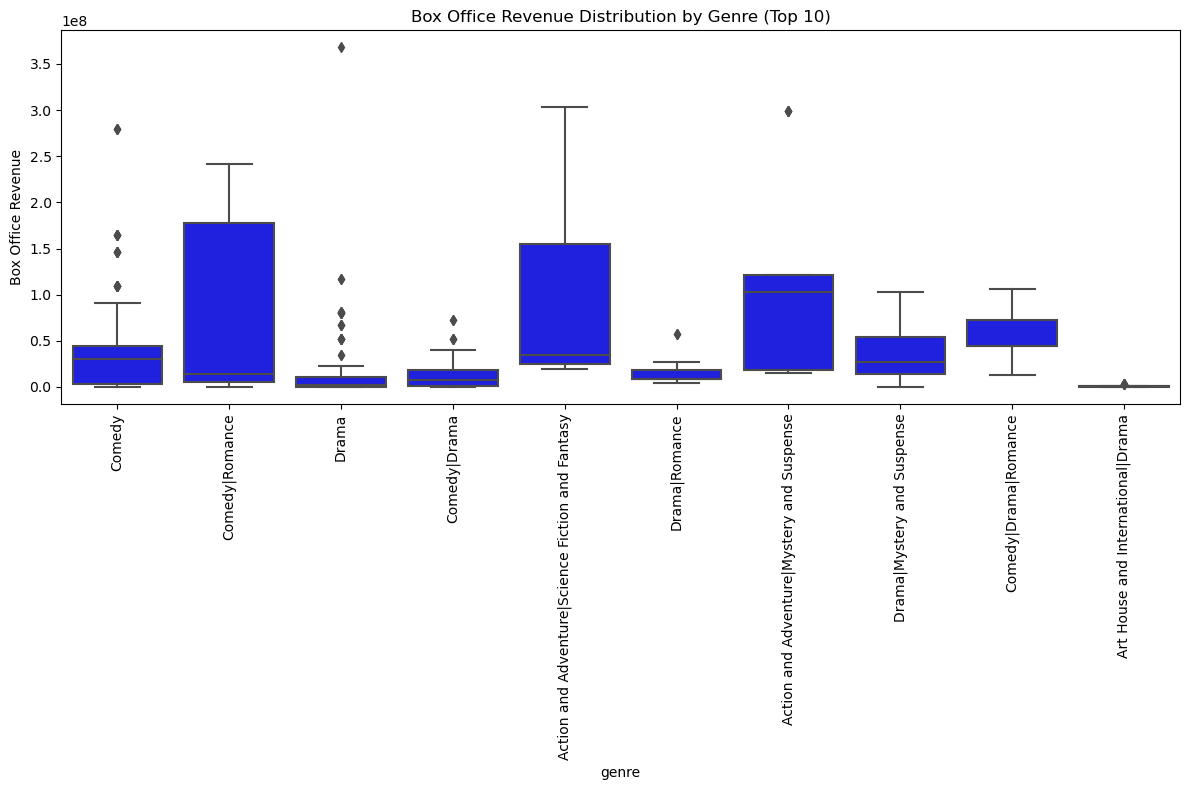

In [29]:
# Calculate the top 10 genres based on frequency count
top10_genres = merged_data['genre'].value_counts().nlargest(10).index.tolist()

plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
plt.xlabel('Genre')

# Data Visualization: Box Plot of Box Office Revenue by Genre (Top 10)
sns.boxplot(data=merged_data[merged_data['genre'].isin(top10_genres)], x='genre', y='box_office', color='blue') # Set color to blue

plt.ylabel('Box Office Revenue')
plt.title('Box Office Revenue Distribution by Genre (Top 10)')
plt.tight_layout()
plt.show()

## 6. Conclusion 

* The top genres that have shown popularity and high average box office revenue are Comedy and Romance.

* Collaboration with successful directors like Mel Gibson and Peter Jackson can significantly contribute to the movie studio's success.

* There is a moderate positive correlation between the runtime of a movie and box office revenue. Generally longer movies tend to have higher revenue. 

## 7. Recommendations

* Microsoft's new movie studio should consider producing movies in popular genres like Romance, Action, Adventure, and Comedy. These genres have a proven track record of attracting audiences and generating revenue.

* Collaborating with successful directors like Mel Gibson, Peter Jackson, or Steven Spielberg can increase the chances of producing movies with high box office revenue. Their expertise and reputation can contribute to the success of the studio's movies.

* Microsoft's movie studio should carefully determine the runtime of their movies. Finding the right balance between engaging storytelling and audience attention span can maximize the movie's success.